# Modelagem de um sistema presa-predador simples

## Equação de Lotka-Volterra

*(retirado da Wikipedia)*

Na matemática, as equações de Lotka-Volterra são um par de equações diferenciais, não lineares e de primeira ordem, frequentemente utilizadas para descrever **dinâmicas nos sistemas biológicos**, especialmente quando duas espécies interagem: **uma como presa e outra como predadora**. Segundo Lütz (2011), modelos mais básicos para predador-presa de duas espécies são chamados de Lokta-Volterra, e **consideram que a única fonte de alimento da espécie predadora é a população da presa e que não há competição alguma entre indivíduos da mesma espécie.**
Percebe-se então que esse modelo não descreve de fato uma relação completa desses seres no meio ambiente, uma vez que não considera nenhum outro fator externo, como condições climáticas por exemplo, porém compreender esse modelo simples facilita o entendimento de modelos mais complexos.

#### Parâmetros que representam a interação entre as duas espécies:

- $\alpha$ taxa de crescimento da população de presas;
- $\gamma$ taxa de decréscimo da população de predadores;
- $\beta$ taxa de decréscimo da população de presas;
- $\delta$ taxa de crescimento da população de predadores.

#### Variáveis:

- $t$ representa o tempo (em dias, por exemplo);
- $y(t)$ é o número de predadores (raposas) no instante $t$;
- $x(t)$ é o número de presas (coelho) no instante $t$.

#### HIPÓTESES:

1. Se os predadores forem extintos, a população da presa cresce a uma taxa proporcional à população atual:
   
   $\begin{equation*}y(t) = 0, \quad \dfrac{dx}{dt} = \alpha x\end{equation*}$
3. Se as presas forem extintas, a população de predadores deve se extinguir (a presa é seu único alimento) a uma taxa proporcional à sua população:

   $\begin{equation*}x(t)=0, \quad \dfrac{dy}{dt} = -\gamma y\end{equation*}$
5. Os encontros tendem a gerar morte da presa e alimentação do predador, assim temos alterações nas populações:
   - População da presa sofre redução: $\quad -\beta xy$
   - População do predador sofre aumento: $\quad\delta xy$

#### SISTEMA DE EQUAÇÕES:

$\begin{equation*}
\dfrac{dx}{dt} = \alpha x - \beta xy, \qquad\dfrac{dy}{dt} = -\gamma y + \delta xy
\end{equation*}$

## Resolução numérica

Adaptado do curso de Cálculo Numérico de Abel Siqueira (https://github.com/abelsiqueira/notebooks-twitch/blob/master/calculo-numerico/PVI.ipynb)

### Método de Runge Kutta para resolução de um sistema de equações diferenciais ordinárias

Em análise numérica, os métodos de Runge–Kutta formam uma família importante de metódos iterativos para a resolução numérica de soluções de equações diferenciais ordinárias. Estas técnicas foram desenvolvidas por volta de 1900 pelos matemáticos C. Runge e M.W. Kutta (*retirado da Wikipedia*)

In [1]:
function rungekutta4(t0, tf, y0, f; N = 100)
    t = range(t0, tf, length=N+1)
    h = t[2] - t[1]
    m = length(y0)
    w = zeros(m, N+1)
    w[:,1] = y0
    for k = 1:N
        θ₁ = f(t[k], w[:,k])
        θ₂ = f(t[k] + h / 2, w[:,k] + h * θ₁ / 2)
        θ₃ = f(t[k] + h / 2, w[:,k] + h * θ₂ / 2)
        θ₄ = f(t[k] + h, w[:,k] + h * θ₃)
        w[:,k+1] = w[:,k] + h * (θ₁ + 2θ₂ + 2θ₃ + θ₄) / 6
    end
    return t, w
end;

#### Define parâmetros

In [2]:
# taxa de decréscimo da população de presas
β = 0.5

# taxa de decréscimo da população de predadores
γ = 0.75

# taxa de crescimento da população de predadores
δ = 0.5

# taxa de crescimento da população de presas
#α(t) = 1.0   # taxa constante
# taxas variando no tempo
α(t) = 1.0 - 0.9 * 1/(1+exp(-5.0*(t-9))) + 0.9 * 1/(1+exp(-5.0*(t-13)))
#α(t) = 1.0 - 0.9 * 1/(1+exp(-5.0*(t-30))) + 0.9 * 1/(1+exp(-5.0*(t-35)))
#α(t) = 0.9*sin(t)^2 + 0.1

# Tempo inicial
t0 = 0.0

# Tempo final
tf = 50.0

# População inicial de presas
x0 = 3.0

# População inicial de predadores
y0 = 1.0;

#### Resolve o sistema

In [3]:
# x = w[1],  y = w[2]
F(t, w) = [
    α(t) * w[1] - β * w[1] * w[2];
    δ * w[1] * w[2] - γ * w[2]
]

t, w = rungekutta4(t0, tf, [x0;y0], F, N=10*ceil(Int64, tf));

#### Gráficos da solução

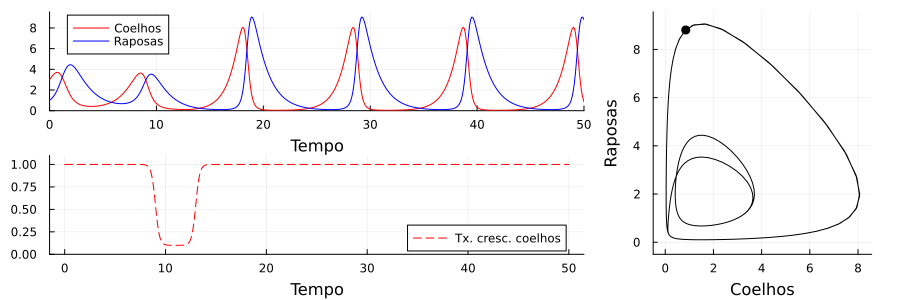

In [4]:
using Plots
gr(size=(900,300));

N = length(t)

layout = @layout [[a; b] c{0.32w,0.95h}]
p = plot(size=(900,300), layout=layout, ratio=:equal)
xi, yi = w[:,N]
plot!(p[3], w[1,:], w[2,:], c=:black, leg=false)
scatter!(p[3], [xi], [yi], c=:black, ms=5)
xlabel!(p[3], "Coelhos")
ylabel!(p[3], "Raposas")
xlims!(p[3], -0.5, maximum(w[1,:]) + 0.5)
ylims!(p[3], -0.5, maximum(w[2,:]) + 0.5)

plot!(p[1], leg=:topleft, ratio=:none)
plot!(p[1], t, w[1,:], c=:red, lab="Coelhos")
plot!(p[1], t, w[2,:], c=:blue, lab="Raposas")
xlims!(p[1], 0, t[end])
ylims!(p[1], 0, maximum(w) + 0.5)
xlabel!(p[1], "Tempo")

plot!(p[2], t, α.(t), c=:red, l=:dash, lab="Tx. cresc. coelhos", ratio=:none)
ylims!(p[2], 0.0, 1.1)
xlabel!(p[2], "Tempo")

png("presa-predador")
p

#### Animação

[ Info: Saved animation to /home/leonardo/Dropbox/UFES/Mat Ind/presa predador/tmp.gif


Plots.AnimatedGif("/home/leonardo/Dropbox/UFES/Mat Ind/presa predador/tmp.gif")
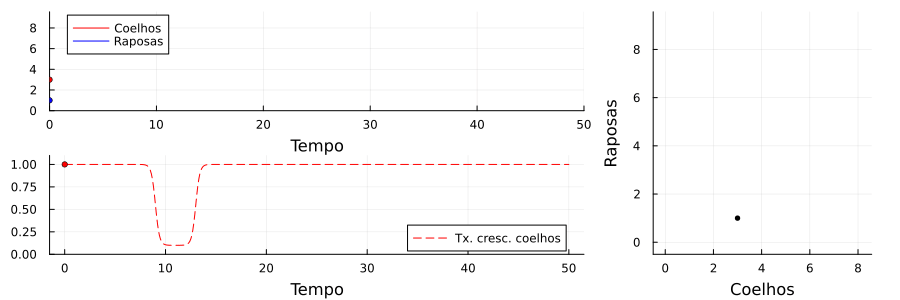

In [5]:
@gif for i = 1:N
    p = plot(size=(900,300), layout=layout, ratio=:equal)
    
    xi, yi = w[:,i]
    plot!(p[3], w[1,1:i], w[2,1:i], c=:black, leg=false)
    scatter!(p[3], [xi], [yi], c=:black, ms=3)
    xlabel!(p[3], "Coelhos")
    ylabel!(p[3], "Raposas")
    xlims!(p[3], -0.5, maximum(w[1,:]) + 0.5)
    ylims!(p[3], -0.5, maximum(w[2,:]) + 0.5)
    
    plot!(p[1], leg=:topleft, ratio=:none)
    plot!(p[1], t[1:i], w[1,1:i], c=:red, lab="Coelhos")
    plot!(p[1], t[1:i], w[2,1:i], c=:blue, lab="Raposas")
    scatter!(p[1], [t[i]], [w[1,i]], c=:red, ms=3, lab="")
    scatter!(p[1], [t[i]], [w[2,i]], c=:blue, ms=3, lab="")
    
    xlims!(p[1], 0, t[end])
    ylims!(p[1], 0, maximum(w) + 0.5)
    xlabel!(p[1], "Tempo")
    
    plot!(p[2], t, α.(t), c=:red, l=:dash, lab="Tx. cresc. coelhos", ratio=:none)
    ylims!(p[2], 0.0, 1.1)
    scatter!(p[2], [t[i]], [α(t[i])], c=:red, ms=3, lab="")
    xlabel!(p[2], "Tempo")
end every 2